07-1

## learning rate

: hyper-parameter로 얼마만큼 최적화 해서 모델을 만들어 낼 것이냐. 

모델의 Gradient descent시, 반복의 간격을 얼마만큼 진행할 것인지.

- learning rate가 최적의 값으로 잘 설정이 되면, cost값의 그래프가 내려감.
- learning rate값이 너무 크거나 너무 작아도 안됨. → 적절한 조절 필수!
    - 오버슈팅 발생
    - 너무 느린 학습 속도
- Best learning rate for Adam
    
    ‘Adam Optimizer’= 0.0003
    
- Learning Rate Decay기법:
    
    : cost 비용이 작아지다가 더이상 학습이 되지 않는 지점에서 learning rate값을 계속 더 줄이면서 학습을 높일 수 있다
    
    - Step decay
    - Exponential decay
    - 1/t decay

⇒ Gradient 값과 learning rate 값의 관계를 통해 최적의 값을 찾아낼 수 있음. 

## Data Preprocessing

데이터 전처리

1. **Feature Scaling**
- Standardization(Mean Distance)
    
    → `Standardization = (data - np.mean(data))/sqrt(np.sum((data-np.mean(data))^2) / np.count(data))`
    
- Normalization(0~1)
    
     → `Normalization = (data - np.min(data, 0)) / (np.max(data, 0) - np.min(data, 0))`
    
1. **Noisy Data**
    
    : 쓸모없는 데이터를 없애줌.
    

---

07-2-1.

## Overfitting

학습이 반복 될 수록 가설에 맞춰져 가면서 traingdata에는 잘 맞겠지만, test data에 대해서는 정확도가 떨어짐. 

이상적으로는 test data와 training data가 모두 잘 맞아야 함. 

- High bias(편향)
- Just right
- High variance

1. **Set a features** 
    - 학습데이터를 더 많이 두는 것
    - feature 수 줄이기  ‘PCA’ 방식
    - Add additional feature - Hypothesis를 좀 더 구체화 시킴.

1. **Regularization (Add term to loss)**
    
     → Linear regression with regularization 
    
2. **Solutions**
    - Feature Normalization
    - Regularization
    - More Data (Data Augmentation)
        - Color Jilttering
        - Horizontal Flips
        - Random Crops/Scales
    - Dropout
    - Batch Normalization

---

Lab 07-3

**Training and Validation**

: data의 구성이 가장 중요함. 

Evaluating a hypothesis

: 모델의 파라미터를 잘 fit한 후 Layer/ learning rate/ optimizer  

```jsx
test_acc = accuracy_fn(softmax_fn(x_Test), y_Test)
modle.evaluate(x_Test, y_Test(
```

**Anomaly detection** 

: 정상 데이터를 가지고 학습했을 때, 이상데이터가 발생했을 때 잘 감지할 수 있음. 

## Learning

- Online learning
- Batch learning

![image](https://user-images.githubusercontent.com/92504386/198956295-7ba86a21-6373-41e2-b8ce-0942e860b259.png)


- Fine Tuning
    
    : weight값을 미세하게 조절
    
- Reautre Extraction
    
    : 기존의 모델을 만들어 놓은 상태에서 새로운 task가 들어올 때 그에 맞게 다시 학습 시킴. 
    
- Efficient Models
    
    : less inference time is needed, so we need light weight
    
    → 모바일로도 학습 시킬 수 있음 
    
    → 차원 감소의 장점. → 속도 증가 
    
    `tf.nn.depthwise_conv2d(input, filter strides, padding)`

## Lab 07-01 

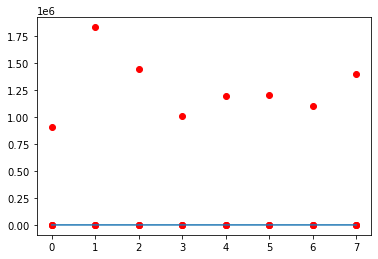

In [29]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline


xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

x_train = xy[:, 0:-1]
y_train = xy[:, [-1]]

plt.plot(x_train, 'ro')
plt.plot(y_train)
plt.show()

In [30]:
def normalization(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / denominator

xy = normalization(xy)

In [35]:
tf.random.set_seed(777)  # for reproducibility

dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train)).repeat()

iter=tf.compat.v1.data.make_initializable_iterator()

features, labels = iter.get_next()

features = tf.cast(features, tf.float32)
labels= tf.cast(labels, tf.float32)


W = tf.Variable(tf.random.normal([4, 1]))
b = tf.Variable(tf.random.normal([1]))

hypothesis = tf.matmul(features, W)+b

cost = tf.reduce_mean(tf.square(hypothesis-labels))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

EPOCHS=101

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(EPOCHS):
        sess.run(iter.initializer)
        _, loss_value, hypo_value = sess.run([train, cost, hypothesis])
        print("Iter:{}, Loss: {:.4f}, Prediction: {}".format(step, loss_value, hypo_value))
    

TypeError: make_initializable_iterator() missing 1 required positional argument: 'dataset'

In [15]:
def linearReg_fn(features):
    hypothesis = tf.matmul(features, W)+b
    return hypothesis

In [16]:
def l2_loss(loss, beta = 0.01):
    W_reg = tf.nn.l2_loss(W)
    loss = tf.reduce_mean(loss + W_reg * beta)
    return loss

In [17]:
def loss_fn(hypothesis, labels, flag = False):
    cost = tf.reduce_mean(tf.square(hypothesis - labels))
    if(flag):
        cost = l2_loss(cost).l2_loss(W)
    loss = tf.reduce_mean(loss + W_reg * beta)
    return loss
    return cost

In [27]:

# import tensorflow.compat.v1 as tf

# tf.disable_v2_behavior()

# EPOCHS = 101 

# is_decay = True
# starter_learning_rate = 0.1

# if(is_decay):
#     global_step = tf.Variable(0, trainable = False)
#     learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step, 50, 0.96, staircase = True)
#     optimizer = tf.train.GradientDescentOptimizer(learning_rate)
# else:
#     optimizer = tf.train.GradientDescentOptimizer(learning_rate=starter_learning_rate)
    
# def grad(features, labels, l2_flag):
#     with tf.GradientTape() as tape:
#         loss_value = loss_fn(linearReg_fn(features), labels, l2_flag)
#     return tape.gradient(loss_value, [W,b]), loss_value



# with tf.Session() as sess:
#     sess.run(tf.global_variables_initializer())
#     for step in range(EPOCHS):
#         sess.run(iter.initializer)
#         _, loss_value, hypo_value = sess.run([train, cost, hypothesis])
#         print("Iter: {}, Loss: {:.4f}, Prediction: {}".format(step, loss_value, hypo_value))  

# # for step in range(EPOCHS):
# #     for features, labels in tfe.Iterator(dataset):
# #         features = tf.cast(features, tf.float32)
# #         labels = tf.cast(labels, tf.float32)
# #         grads, loss_value = grad(linearReg_fn(features), features, labels, False)
# #         optimizer.apply_gradients(grads_and_vars = zip(grads, [W,b]), global_step = global_step)
        
# #         if step%10 ==0:
# #             print("Iter:{}, Loss:{:.4f}, Learning Rate: {:.8f}".format(step, loss_value, optimizer._learning_rate()))
    


NameError: name 'train' is not defined

In [28]:

import tensorflow.compat.v1 as tf

tf.disable_v2_behavior()

EPOCHS = 101 

is_decay = True
starter_learning_rate = 0.1

if(is_decay):
    global_step = tf.Variable(0, trainable = False)
    learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step, 50, 0.96, staircase = True)
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
else:
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=starter_learning_rate)
    
def grad(features, labels, l2_flag):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(linearReg_fn(features), labels, l2_flag)
    return tape.gradient(loss_value, [W,b]), loss_value


for step in range(EPOCHS):
    for features, labels in tfe.Iterator(dataset):
        features = tf.cast(features, tf.float32)
        labels = tf.cast(labels, tf.float32)
        
        grads, loss_value = grad(linearReg_fn(features), features, labels, False)
        optimizer.apply_gradients(grads_and_vars=zip(grads, [W, b]), global_step=global_step)
        
        if step % 10 ==0:
            print("Iter:{}, Loss: {:.4f}, Learning Rate: {:.8f}".format(step, loss_value, optimizer._learning_rate()))

NameError: name 'tfe' is not defined

## Lab07 


In [37]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

tf.random.set_seed(777)  # for reproducibility
print(tf.__version__)

2.10.0


In [38]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4422102/4422102 [==============================] - 1s 0us/step


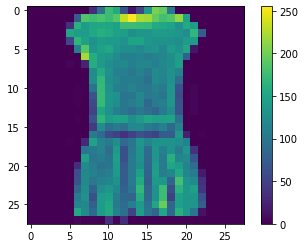

In [39]:
plt.figure()
plt.imshow(train_images[3])
plt.colorbar()
plt.grid(False)

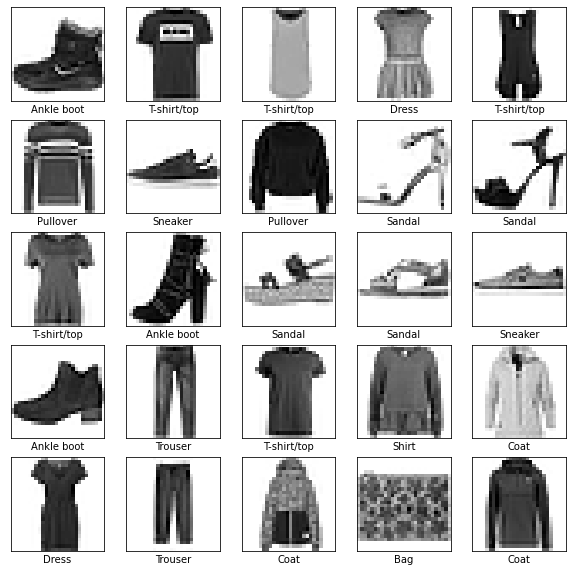

In [40]:
train_images = train_images / 255.0
test_images = test_images / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [41]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [42]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 60us/sample - loss: 0.4999 - acc: 0.8264
Epoch 2/5
60000/60000 [==============================] - 3s 55us/sample - loss: 0.3771 - acc: 0.8649
Epoch 3/5
60000/60000 [==============================] - 3s 58us/sample - loss: 0.3389 - acc: 0.8778
Epoch 4/5
60000/60000 [==============================] - 3s 54us/sample - loss: 0.3148 - acc: 0.8854
Epoch 5/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.2971 - acc: 0.8910


In [43]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

C:\Users\kv069\anaconda3\lib\site-packages\keras\engine\training_v1.py:2332: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Test accuracy: 0.8753
